In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# import data set
# skip the first 56 lines (description of the dataset)
df=pd.read_csv('./co2_mm_mlo.csv',skiprows=56)
df[df<0]=np.nan # replace negative values with NaN
time=df.iloc[:,2] # get the decimal date variable
co2=df['average']
# df, time, co2
df

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,NaN,NaN,NaN
1,1958,4,1958.2877,317.45,315.16,NaN,NaN,NaN
2,1958,5,1958.3699,317.51,314.71,NaN,NaN,NaN
3,1958,6,1958.4548,317.24,315.14,NaN,NaN,NaN
4,1958,7,1958.5370,315.86,315.18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
774,2022,9,2022.7083,415.95,419.49,28.0,0.41,0.15
775,2022,10,2022.7917,415.78,419.13,30.0,0.27,0.10
776,2022,11,2022.8750,417.51,419.51,25.0,0.52,0.20
777,2022,12,2022.9583,418.95,419.66,24.0,0.50,0.20


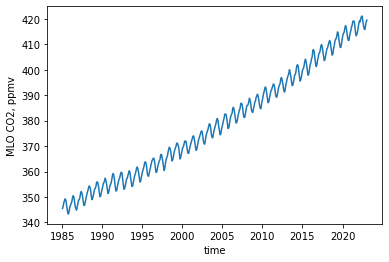

In [45]:
# let's make a plot
ind= (time>=1985) & (~np.isnan(co2))
plt.plot(time[ind],co2[ind])
plt.xlabel('time')
plt.ylabel('MLO CO2, ppmv')
plt.show()

In [1]:
# Linear regression
# pseudo inverse of matrix
ind= (time>=1985) & (~np.isnan(co2))

x=time[ind]
y=co2[ind]
N=np.size(x)
A=np.ones((N,2)) # N x 2 matrix
A[:,0]=x
xvec=np.linalg.pinv(A)@y
yest=A@xvec
r=np.corrcoef(yest,y)
R2=r[0,1]**2
# r=np.corrcoef(x,y)
print(f'R2 = {R2:5.4}')

# plot the results
# label measured data and fitted line
plt.plot(time[ind],co2[ind],label='Measured')
plt.plot(x,yest,'-',label='Fitted')
# add legend
plt.legend()
plt.xlabel('time')
plt.ylabel('MLO CO2, ppmv')
plt.show()

NameError: name 'time' is not defined

R2 = 0.9894


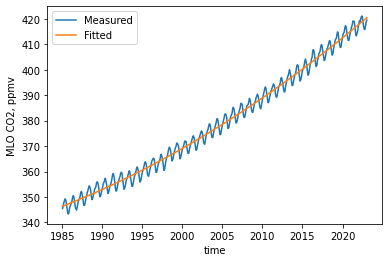

In [48]:
# Linear regression
# pseudo inverse of matrix
ind= (time>=1985) & (~np.isnan(co2))
x=time[ind]
y=co2[ind]
N=np.size(x)
A=np.ones((N,3)) # N x 3 matrix
A[:,0]=x**2
A[:,1]=x
xvec=np.linalg.pinv(A)@y
yest=A@xvec
r=np.corrcoef(yest,y)
R2=r[0,1]**2
print(f'R2 = {R2:5.4}')

# plot the results
# label measured data and fitted line
plt.plot(time[ind],co2[ind],label='Measured')
plt.plot(x,yest,'-',label='Fitted')
# add legend
plt.legend()
plt.xlabel('time')
plt.ylabel('MLO CO2, ppmv')
plt.show()

R2 = 0.9985


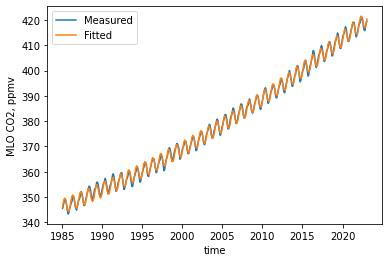

In [49]:
# Linear regression with quadratic term and sine/cosine with one year periodicity
# pseudo inverse of matrix
ind= (time>=1985) & (~np.isnan(co2))
x=time[ind]
y=co2[ind]
N=np.size(x)
A=np.ones((N,5)) # N x 3 matrix
A[:,0]=x**2
A[:,1]=x
A[:,2]=np.cos(2*np.pi*x)
A[:,3]=np.sin(2*np.pi*x)
xvec=np.linalg.pinv(A)@y
yest=A@xvec
r=np.corrcoef(yest,y)
R2=r[0,1]**2

print(f'R2 = {R2:5.4}')
# plot the results
# label measured data and fitted line
plt.plot(time[ind],co2[ind],label='Measured')
plt.plot(x,yest,'-',label='Fitted')
# add legend
plt.legend()
plt.xlabel('time')
plt.ylabel('MLO CO2, ppmv')
plt.show()


In [50]:
xvec

array([ 1.87434029e-02, -7.31718452e+01, -9.20376341e-01,  2.78628678e+00,
        7.17391332e+04])